In [443]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

In [444]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [445]:
exp1 = np.fromfile('D://gate.txt',dtype=float,count=-1, sep=" ")
#exp2 = np.fromfile('D://m.dat',dtype=float,count=-1, sep=" ")
#exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

In [446]:
#exp4 = np.reshape(exp4, (-1, 3))
#exp4=np.transpose(exp4)

In [447]:
exp1 = np.reshape(exp1, (64, -1))
#exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
#exp1=np.transpose(exp1)
#exp2 = np.reshape(exp2, (161, 201))


In [448]:
exp1.shape

(64L, 121L)

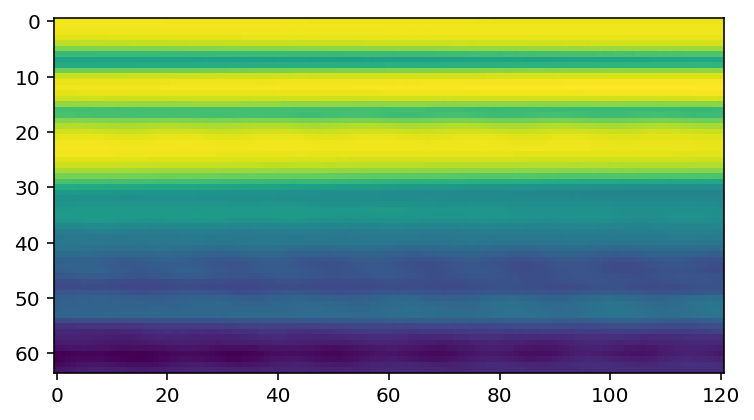

In [449]:
plt.imshow(exp1)

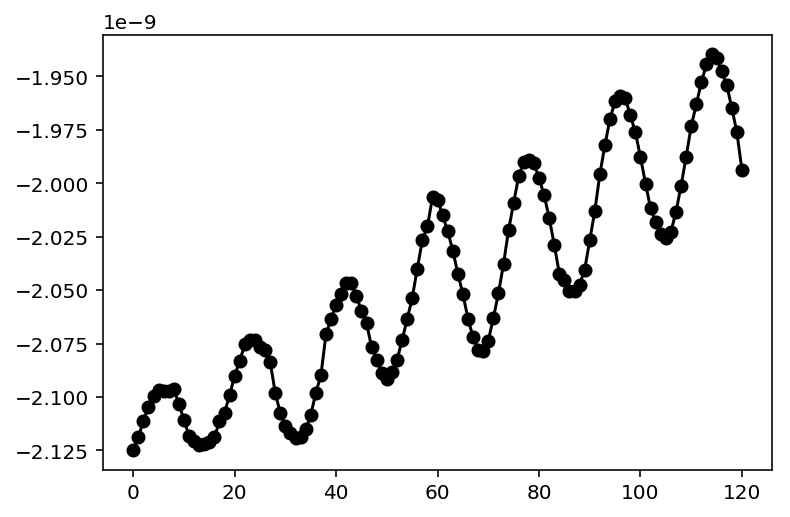

In [450]:
#plt.plot(exp1[20],'-or')
#plt.plot(exp1[40],'-ob')
plt.plot(exp1[60],'-ok')

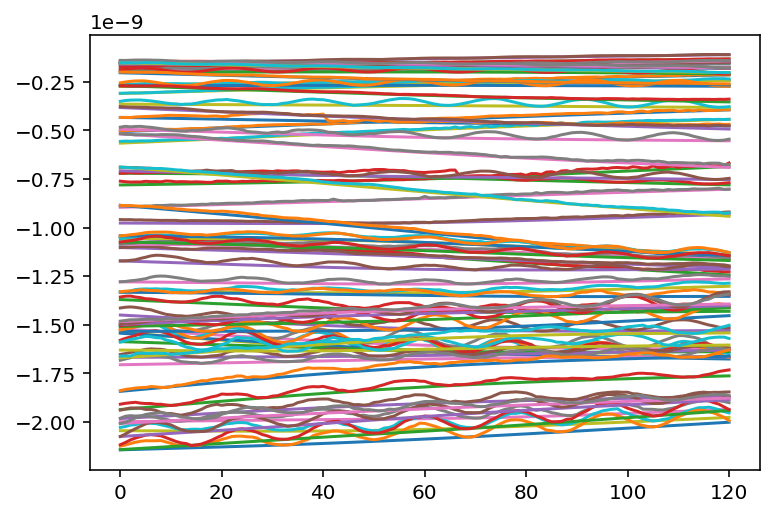

In [451]:
#exp1=np.transpose(exp1)
for i in xrange(64):
    new_matrix[i]=exp1[i]-baseline_als(exp1[i],1000,0.001,100)
    plt.plot(baseline_als(exp1[i],1000,0.001,100))
    plt.plot(exp1[i])
#row_sums = exp1.sum(axis=1)
#new_matrix = exp1 / row_sums[:, numpy.newaxis]


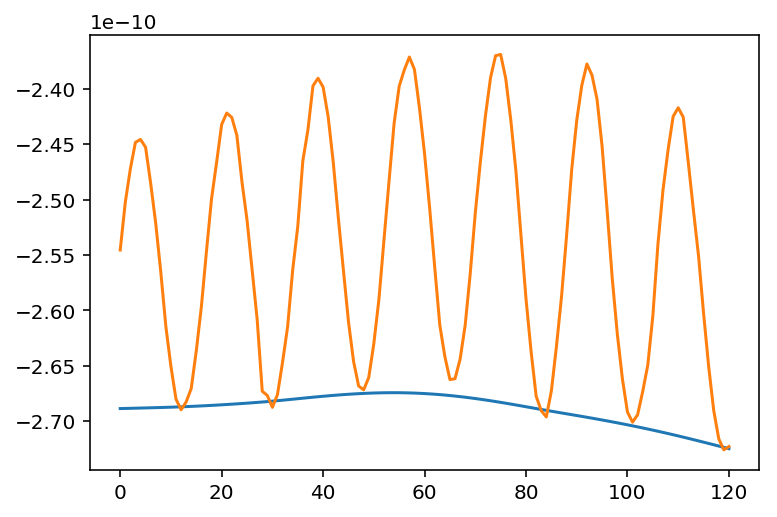

In [452]:
plt.plot(baseline_als(exp1[20],1000,0.001,100))
plt.plot(exp1[20])

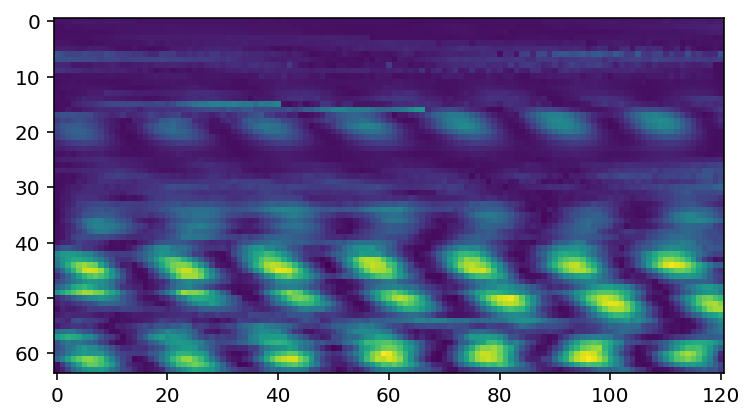

In [453]:
plt.imshow(new_matrix)

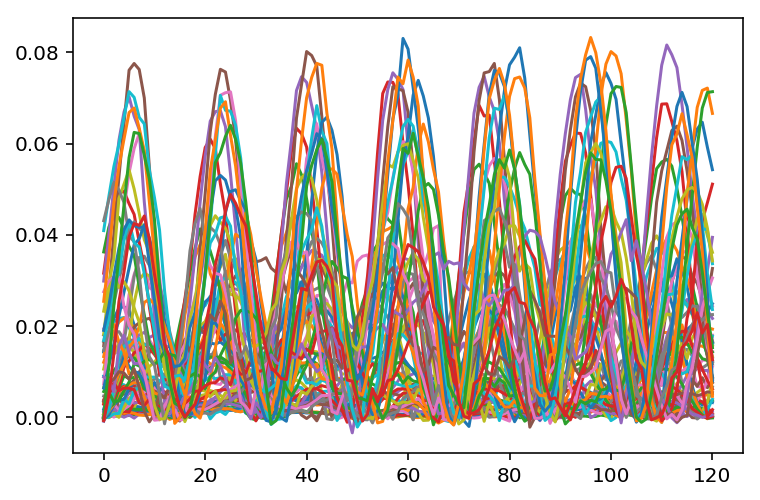

In [454]:
for i in xrange(0,64):
    plt.plot(new_matrix[i]*1E9)

In [455]:
stab = np.fromfile('D://stability.txt',dtype=float,count=-1, sep=" ")
stab = np.reshape(stab, (85, -1))

(30, 20)

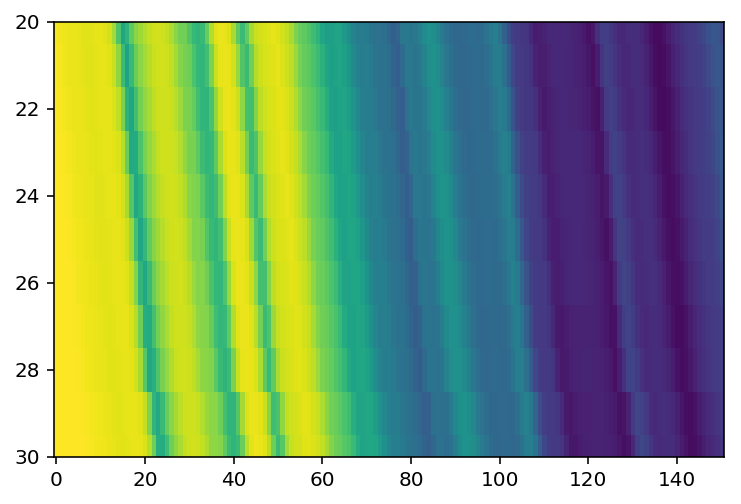

In [456]:
plt.imshow(stab,aspect='auto')
stab.shape
plt.ylim(30,20)

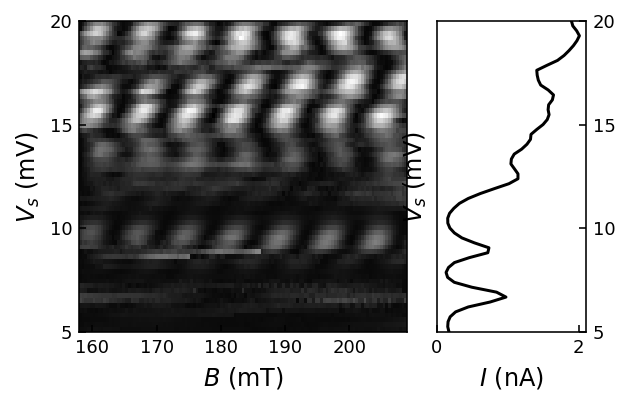

In [436]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.2, hspace=1)

ax1 = plt.subplot(gs[0:3, 0:2])
plt.imshow(new_matrix*1E9,extent=[158,209,5,20], cmap=cm.gray, origin="lower",aspect='auto')
plt.ylabel("$V_s$ (mV)", color='k',fontsize=12)
plt.xlabel("$B$ (mT)", color='k',fontsize=12)
plt.tick_params(direction='in',labelsize=9)
plt.yticks([5,10,15,20],fontsize=9)
plt.ylim(5,20)
ax2 = plt.subplot(gs[0:3, 2:3])
b=np.linspace(5, 20, num=64)
plt.plot(np.transpose(exp1)[60]*-1E9,b,'k')
plt.ylim(5,20)
plt.xlim(0,2.1)
plt.tick_params(direction='in', labelright=True, right=True,labelleft=False, left=False)
plt.xlabel("$I$ (nA)", color='k',fontsize=12)
plt.ylabel("$V_s$ (mV)", color='k',fontsize=12)
plt.tick_params(direction='in',labelsize=9)
plt.yticks([5,10,15,20],fontsize=9)
plt.savefig('D:\\phase3.pdf',bbox_inches='tight', format='pdf',dpi = 1000)

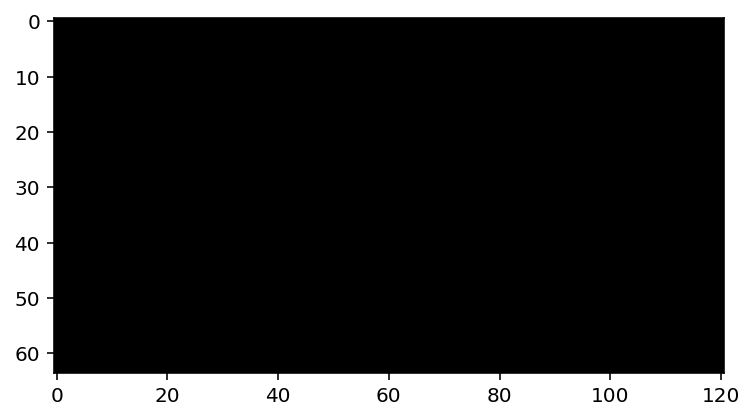

In [437]:

plt.imshow(new_matrix,vmax=0.01,vmin=0.0075,cmap='Greys_r')
#exp1[1].shape


In [438]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(158,209,121)

for i in range(0,64):
    FFT = abs(scipy.fft(new_matrix[i]))
    freqs = scipy.fftpack.fftfreq(new_matrix[i].size, t[1]-t[0])
    new_matrix2[i]=FFT
    new_matrix2[0]=freqs
#for i in range(0,64):
#    plt.plot(new_matrix2[0],new_matrix2[i])
    #plt.xlim(0.,0.07)

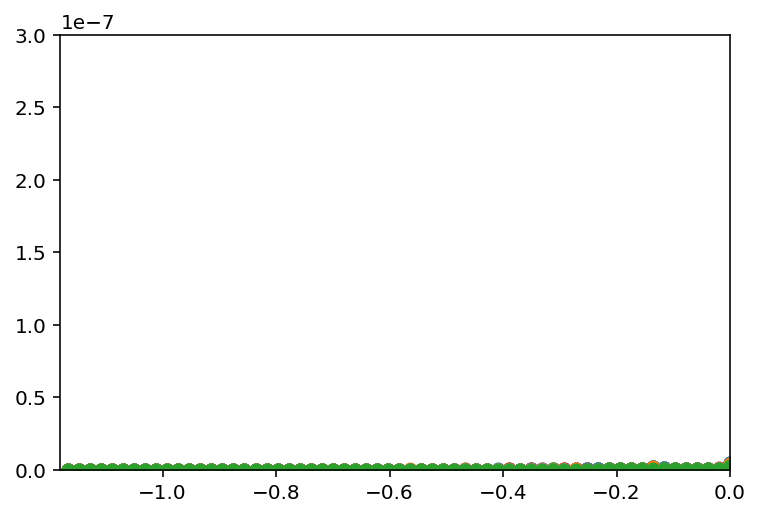

In [439]:
for i in range(1,64):
    plt.plot(new_matrix2[0],new_matrix2[i],'o')
    plt.xlim(-1.18,0)
    plt.ylim(0,3E-7)

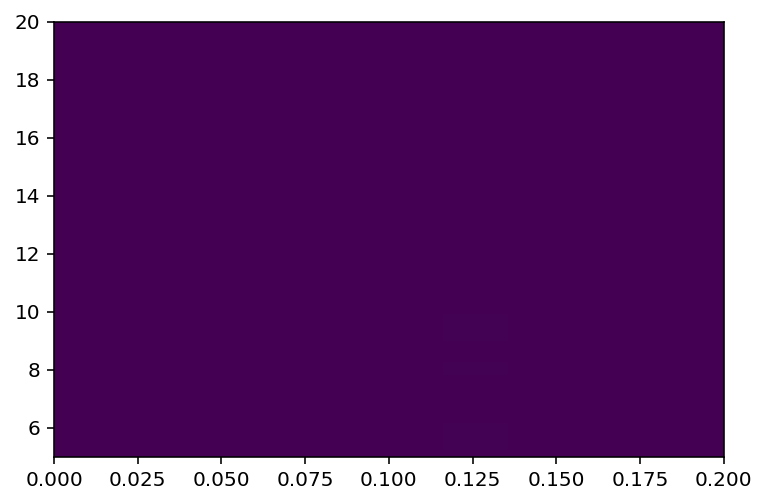

In [440]:
plt.imshow(new_matrix,vmax=3E-7,vmin=0,extent=[2.34,0,5,20],aspect='auto')
plt.xlim(0,0.2)
plt.savefig('D:\\proof.pdf',bbox_inches='tight', format='pdf',dpi = 1000)

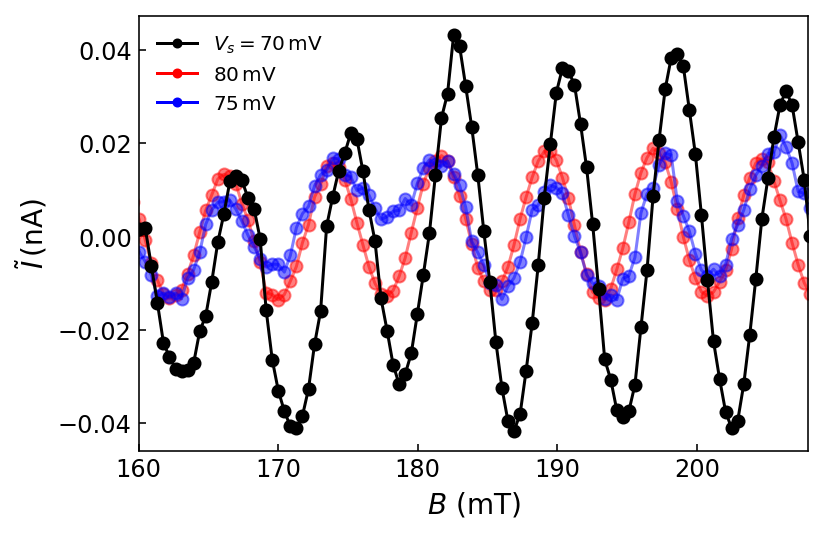

In [465]:
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=4, label='$80\,$mV')
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=4,label='$75\,$mV')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=4,label='$V_s=70\,$mV')
leg=plt.legend(handles=[black_patch,red_patch,blue_patch],loc=2,fontsize=10)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
plt.plot(x,new_matrix[20]*1E9-0.013,'-or',alpha=0.5)
plt.plot(x,new_matrix[40]*1E9-0.013,'-ob',alpha=0.5)
plt.plot(x,new_matrix[60]*1E9-0.04,'-ok')
plt.ylabel("$\widetilde{I}\,$(nA)", color='k',fontsize=14)
plt.xlabel("$B$ (mT)", color='k',fontsize=14)
plt.tick_params(direction='in',labelsize=12)
plt.xlim(160,208)
#plt.ylim(-0.05,0.05)
x=np.linspace(157, 209, num=121)
plt.savefig('D:\\phase2.pdf',bbox_inches='tight', format='pdf',dpi = 1000)

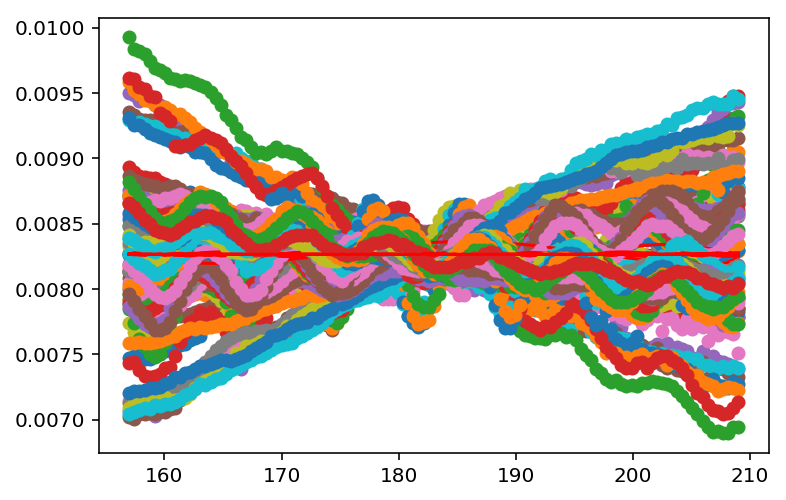

In [221]:
#!/usr/bin/env python
#<examples/doc_basic.py>
a=np.linspace(0, 0, num=121)
b=np.linspace(0, 0, num=121)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(0,64):
    
    x=np.linspace(157, 209, num=121)
    data=new_matrix[i,:]
    res=np.linspace(4.2, 3.6, num=121)
    #A=0.0082666210081654996
    #B=-7.0864837737938933e-05
    f=3.35
    ff=-0.4
    def fcn2min(params, x, data):
        A = params['A']
        B = params['B']
    #    f = params['f']
    #    ff = params['ff']
    #    p = params['p']
    #    C = params['C']
        res=A+B*np.sin((f+ff*i)*x)
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('A',   value= 1)
    params.add('B', value= 1)
#    params.add('f',   value= 3.35)
#    params.add('ff',   value= -0.04)
#    params.add('C',   value= 0)
   # params.add('p', value= 0)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    exp1[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.ylim(9,10)
    params2=result.params
    v = params2.valuesdict()
    #a[i]=v['p']
#    b[i]=v['ff']
#    b[i]=v['B']
#plt.savefig('D:\\sl2.pdf', format='pdf')

In [222]:
v

OrderedDict([('A', 0.008264470474676289), ('B', -1.6509422788529969e-06)])

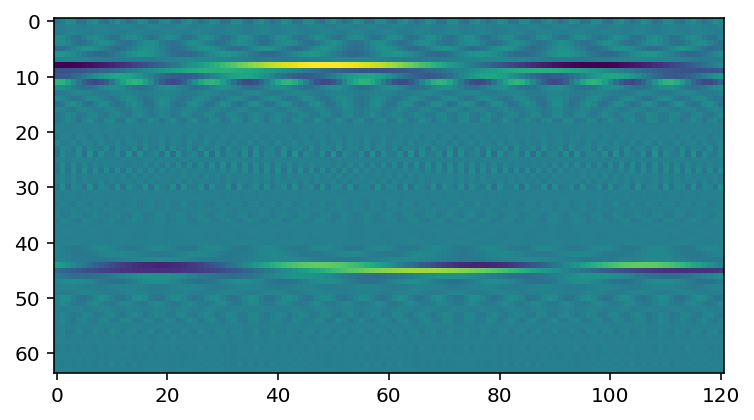

In [223]:
plt.imshow(exp1)

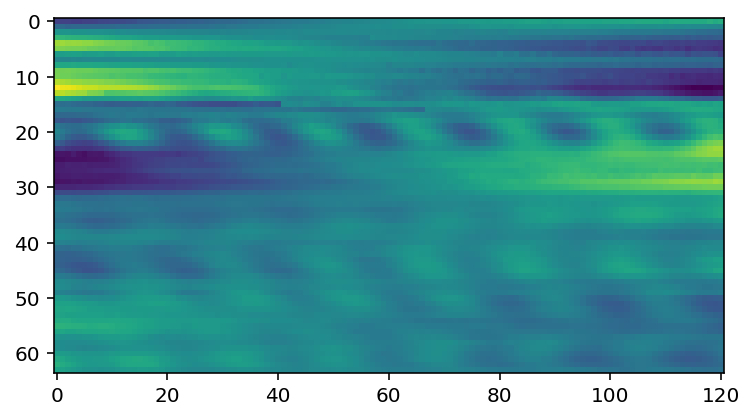

In [50]:
plt.imshow(new_matrix
          )

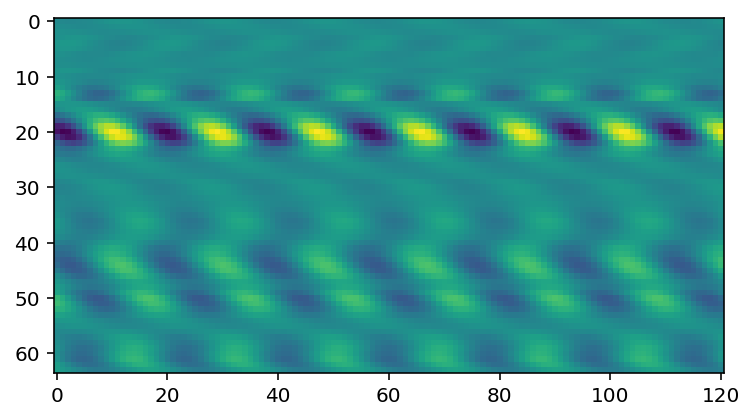

In [15]:
plt.imshow(exp1)

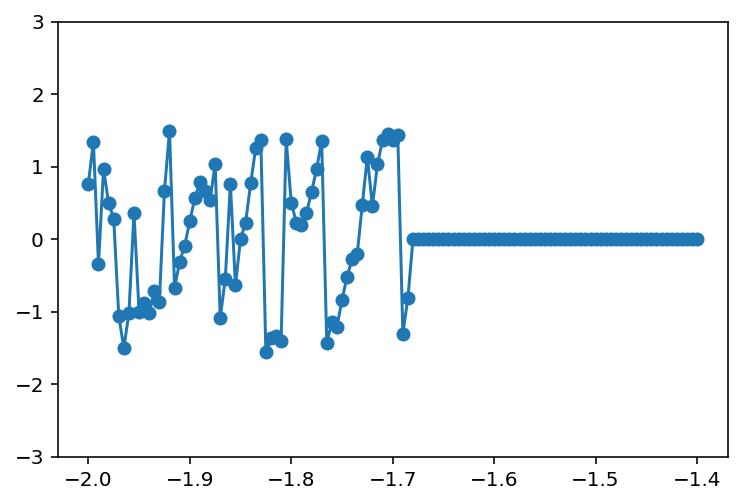

In [16]:

#for i in range(0,201):
#    plt.plot(expp1[i])
x=np.linspace(-2, -1.4, num=121)
plt.plot(x,(a),'o-')
#plt.plot(exp4[0],exp4[1]*4E9,'r')
#plt.xlim(-2,-1.4)
plt.ylim(-3,3)
#plt.plot(x,(np.transpose(expp1))[9]*1E9, '-k')
np.savetxt('D:\\pha', a, delimiter=' ') 

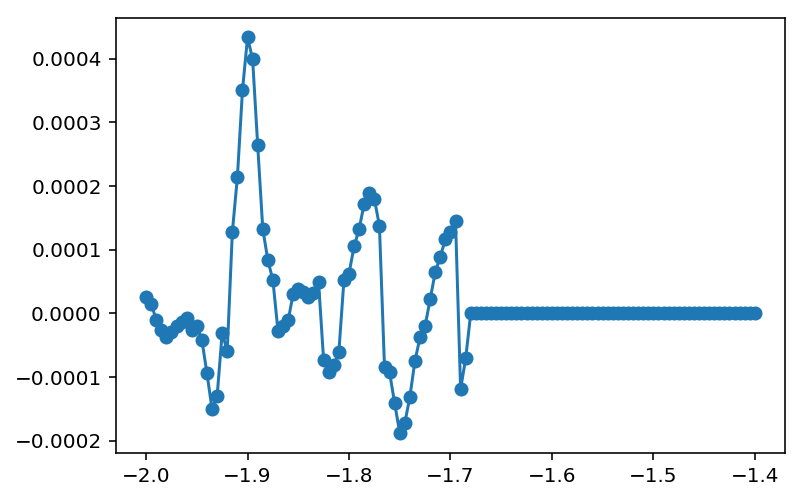

In [17]:
plt.plot(x,b,'o-')

In [18]:
x=np.linspace(-0.8, -1.8, num=300)
plt.plot(x, expp1[70], 'r')

np.savetxt('D:\\fit1', expp1[10], delimiter=' ') 

NameError: name 'expp1' is not defined

In [59]:
expp1[10].shape

NameError: name 'expp1' is not defined

In [60]:
plt.imshow(expp1)

NameError: name 'expp1' is not defined

In [61]:
plt.imshow(expp1)

NameError: name 'expp1' is not defined

NameError: name 'exp3' is not defined

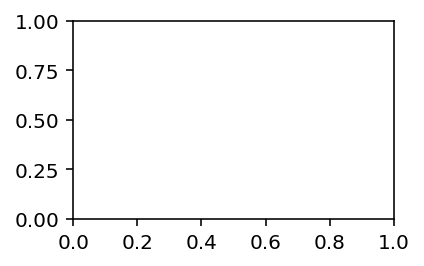

In [62]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')
import matplotlib.patches as patches

fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp3*1E9, interpolation='none', aspect='auto',cmap='Greys_r', extent=[-1.75,-1.25,-1.5,-1.72])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.5,-1.6,-1.7],fontsize=8)
plt.xticks([-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
#plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=8)
#plt.xlabel("$V_{2}$ (V)", color='k',fontsize=12)
plt.xlim(-1.75,-1.25)
plt.ylim(-1.72,-1.50)

ax4 = plt.subplot(gs[0:2:, 2])

xxx=np.linspace(-1.72, -1.5, num=221)
#x6=np.linspace(-2., -0.8, num=251)
plt.plot((a-2)*-1/3.14,xxx,'-k')

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
#xt=np.linspace(0, 0.5, num=4)
#plt.text(1, -0.95, '(2)',color='k', rotation=0,fontsize=8)
plt.title('$\phi$ ($\pi$)', color='black',fontsize=10)
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
#plt.xticks(np.arange(xt.min(), xt.max(),0.2),fontsize=6)

# P.arrow( x, y, dx, dy, **kwargs )


plt.annotate('1st', xy=(3,-1.72), xytext=(3,-1.72),color='#000080',fontsize=8)
plt.annotate('2nd', xy=(3,-1.62), xytext=(3,-1.61),color='#4682B4',fontsize=8)
plt.annotate('3rd', xy=(2,-1.52), xytext=(3,-1.5),color='#00BFFF',fontsize=8)

#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
plt.xlim(-1.5,1.5)
plt.ylim(-1.72,-1.50)

ax4.add_patch(patches.Rectangle(
        (-3, -1.675), 6, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-3, -1.587), 6, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-3, -1.5), 6, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))
#########################################
##########################################
ax1 = plt.subplot(gs[2:4, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp1*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmax=0.50,vmin=0.01, extent=[-1.75,-1.25,-1.5,-1.72])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.5,-1.6,-1.7],fontsize=8)
plt.xticks([-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
#plt.xticks(np.arange(xt.min(), xt.max(),-2),fontsize=8)
plt.xlabel("$V_{2}$ (V)", color='k',fontsize=10)
plt.xlim(-1.75,-1.25)
plt.ylim(-1.72,-1.5)


ax4 = plt.subplot(gs[2:4, 2])

plt.plot(exp4[1]*1E9,exp4[0],'-k')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 70, num=4)
plt.xlabel('$I$ (nA)', color='black',fontsize=10)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.xticks(np.arange(xt.min(), xt.max(),30),fontsize=8)
#plt.annotate('1st', xy=(2,-1.72), xytext=(2.1,-1.70),color='black')
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2.1,-1.59),color='blue')
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2.1,-1.48),color='red')
plt.xlim(0,3E1)
plt.ylim(-1.75,-1.50)
ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))






plt.savefig('D:\\test\\phase2.pdf',bbox_inches='tight', format='pdf',dpi = 1000)